# Import

In [2]:
import pandas as pd
from psaw import PushshiftAPI
import datetime as dt
from tqdm import tqdm
import numpy as np
import warnings
import analysis_util
import networkx as nx
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Data

In [3]:
sample = pd.read_csv('/home/pelle/Downloads/comments_pmaw_2016-2021_wsb.csv',nrows=200)
dtypes = sample.dtypes # Get the dtypes
cols = sample.columns # Get the columns
dtype_dictionary = {} 
for c in cols:
    if str(dtypes[c]) == 'int64':
        dtype_dictionary[c] = 'float32' # Handle NANs in int columns
    else:
        dtype_dictionary[c] = str(dtypes[c])
dtype_dictionary['author'] = 'str'
dtype_dictionary['body'] = 'str'
dtype_dictionary['parent_id'] = 'str'
dtype_dictionary['link_id'] = 'str'
dtype_dictionary['id'] = 'str'
dtype_dictionary

{'author': 'str',
 'body': 'str',
 'created_utc': 'float32',
 'id': 'str',
 'link_id': 'str',
 'parent_id': 'str',
 'score': 'float32',
 'parent_author': 'object',
 'root_author': 'float64'}

In [4]:
df_comments_chunked = pd.read_csv('/home/pelle/Downloads/comments_pmaw_2016-2021_wsb.csv', dtype=dtype_dictionary, 
                 keep_default_na=False, 
                 error_bad_lines=False,
                 na_values=['na',''],
                 usecols=['author','parent_author','created_utc'],chunksize=1000000,nrows=1000)

print('Done reading!')
df_comments = pd.concat(df_comments_chunked, ignore_index=True)
df_comments.created_utc = pd.to_datetime(df_comments.created_utc,unit='s')

Done reading!


In [5]:
start = df_comments.created_utc.min()
period = df_comments.created_utc.max()-df_comments.created_utc.min()
step = dt.timedelta(weeks=10)

graph_dict = {}

for i in tqdm(range(int(np.ceil(period / step)))):
    before = start + step*i + step
    # df_comments_before=df_comments.loc[df_comments.created_utc<before]
    
    # G = nx.Graph()
    # G.add_edges_from(df_comments_before[['author','parent_author']].dropna().values)
    # # save graph as pickle to /home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs
    # nx.write_gpickle(G, '/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/{}.gpickle'.format(before))

100%|██████████| 1/1 [00:00<00:00, 2741.38it/s]


In [6]:
str(before)[0:10]

'2016-03-11'

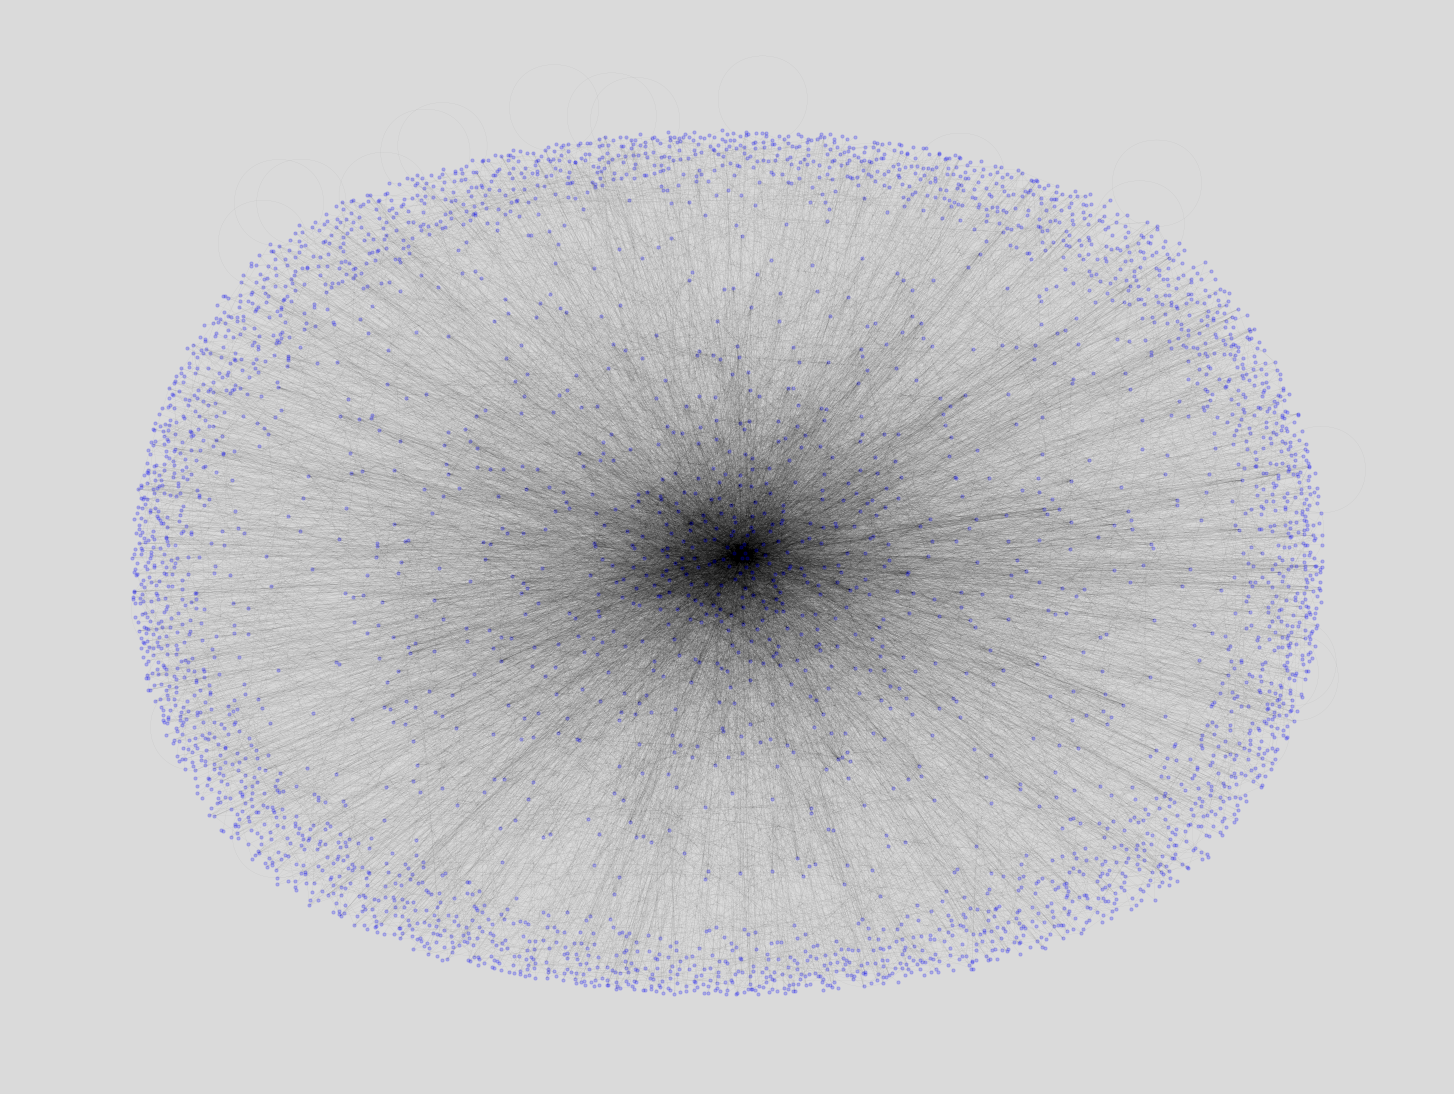

In [89]:
# fig=plt.figure(figsize=(20,15))

# pos = nx.spring_layout(G0,
#     iterations=50,k=0.5)

# nx.draw(G0, 
#     node_color='blue',
#     edge_color='black',
#     with_labels=False,
#     pos=pos,
#     node_size=10,
#     alpha=0.2,width=0.1)

# fig.set_facecolor([0.8549,0.8549,0.8549])
# plt.show()